# El Classico: World's Biggest Sports Rivalry 
    - Analysis of FC Barcelona And Real Madrid's total and head-to-head records

Football Club Barcelona and Real Madrid maintain the biggest rivalry in sports. The head-to-head matches have been named "el classico:, in reverence to their iconic fixtures that always promise to display the finest play from the best players in the world. The rivalry is strong and passionate, for many it goes beyond the sport itself. 

In this project the overall records for each team are calculated and plotted. 

Next, head-to-head records are displayed.

First, packages are imported and the data is read into a pandas dataframe from a csv file.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
spain_df = pd.read_csv('results/spain_clean.csv')
season_results_df = pd.read_csv('results/season_standings.csv')
season_results_df

,Season,Team,Points,Place,GS,GA,GD,Wins,Losses,Ties
0,1928,FC Barcelona,36,1,37,23,14,11,4,3
1,1928,Real Madrid,34,2,40,27,13,11,6,1
2,1928,Real Sociedad,28,3,46,41,5,8,6,4
3,1928,Athletic Bilbao,28,4,43,33,10,8,6,4
4,1928,Arenas de Getxo,27,5,32,39,-7,8,7,3
...,...,...,...,...,...,...,...,...,...,...
1557,2021,Cadiz CF,39,16,35,51,-16,8,15,15
1558,2021,Getafe CF,39,17,33,41,-8,8,15,15
1559,2021,Granada CF,38,18,44,61,-17,8,16,14
1560,2021,Levante UD,35,19,51,76,-25,8,19,11


After getting the records for season results, individual records are selected from each season record by team name. First, FC Barcelona. Then, Real Madrid. The overall totals can be collected from these records. For example, we can see the value counts of each place finished in a season.

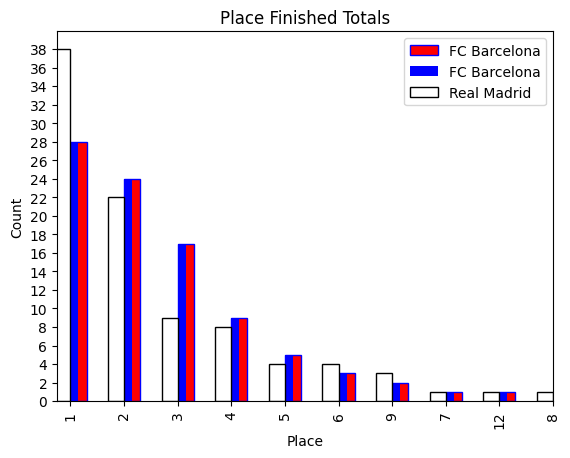

In [87]:
# Gets records for each season by team name
barcelona_season_results_df = season_results_df[season_results_df['Team'] == 'FC Barcelona']
real_madrid_season_results_df = season_results_df[season_results_df['Team'] == 'Real Madrid']

# Gets value counts for places finished by each team
barcelona_place_finished_counts = barcelona_season_results_df['Place'].value_counts()
real_madrid_place_finished_counts = real_madrid_season_results_df['Place'].value_counts()

#gets top 4 finishes
barcelona_top_4= barcelona_place_finished_counts
real_madrid_top_4= real_madrid_place_finished_counts

plt.figure()
barcelona_top_4.plot(kind='bar',label='FC Barcelona', align='edge', xlabel='Place',color='red', edgecolor="blue", ylabel='Count',yticks=(np.arange(0,40, step=2))  ,width= .3)
barcelona_top_4.plot(kind='bar',label='FC Barcelona', align='edge', xlabel='Place',color='blue', ylabel='Count',yticks=(np.arange(0,40, step=2))  ,width= .15)
real_madrid_top_4.plot(kind='bar',label='Real Madrid', align='edge', xlabel='Place',color='white', edgecolor='black', ylabel='Count',yticks=(np.arange(0,40, step=2))  ,width= -.3)
plt.title('Place Finished Totals')
plt.legend()
plt.show()

Above are the totals for both teams place at the end of the season. Real Madrid had 10 more 1st place finishes in the League over Barcelona. 

In [52]:
#gets records for all games with home team as Barcelona
barca_home_df = spain_df[spain_df['home'] == "FC Barcelona"]
#gets records in barcelona home games where real madrid is visiting.
barca_madrid_df = barca_home_df[barca_home_df['visitor'] == 'Real Madrid']
# gets records for all games with home team as Real Madrid
madrid_home_df = spain_df[spain_df['home'] == 'Real Madrid']
#gets records in Real Madrid home games where Barcelona is the visiting team
madrid_barca_df = madrid_home_df[madrid_home_df['visitor'] == 'FC Barcelona']

#Combines home-away records for each team into a singel dataframe and sorts by date.
head_to_head_list = [barca_madrid_df, madrid_barca_df] 
head_to_head_df = pd.concat(head_to_head_list).sort_values( by= 'Date')
head_to_head_df

,Date,Season,home,visitor,score,hgoal,vgoal,hpoint,vpoint
9,1929-02-17,1928,FC Barcelona,Real Madrid,1-2,1,2,0,3
55,1929-05-09,1928,Real Madrid,FC Barcelona,0-1,0,1,0,3
131,1930-01-26,1929,FC Barcelona,Real Madrid,1-4,1,4,0,3
178,1930-03-30,1929,Real Madrid,FC Barcelona,5-1,5,1,3,0
224,1931-02-01,1930,Real Madrid,FC Barcelona,0-0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
25311,2020-03-01,2019,Real Madrid,FC Barcelona,2-0,2,0,3,0
25492,2020-10-24,2020,FC Barcelona,Real Madrid,1-3,1,3,0,3
25726,2021-04-10,2020,Real Madrid,FC Barcelona,2-1,2,1,3,0
25908,2021-10-24,2021,FC Barcelona,Real Madrid,1-2,1,2,0,3


In [129]:
barca_home_df = head_to_head_df[head_to_head_df['home'] == 'FC Barcelona']
b_home_wins_df = barca_home_df[barca_home_df['hpoint'] == 3]
b_home_losses_df = barca_home_df[barca_home_df['hpoint'] == 0]
b_home_ties_df = barca_home_df[barca_home_df['hpoint'] == 1]

barca_visitor_df = head_to_head_df[head_to_head_df['visitor'] == 'FC Barcelona']
b_visitor_wins_df = barca_visitor_df[barca_visitor_df['vpoint'] == 3]
b_visitor_losses_df = barca_visitor_df[barca_visitor_df['vpoint'] == 0]
b_visitor_ties_df = barca_visitor_df[barca_visitor_df['vpoint'] == 1]

b_home_wlt_stats = [ b_home_wins_df.shape[0], b_home_losses_df.shape[0], b_home_ties_df.shape[0]]
b_home_wlt_dict = { 'Wins': b_home_wins_df.shape[0], 'Losses': b_home_losses_df.shape[0], 'Ties': b_home_ties_df.shape[0]}

b_visitor_wlt_stats = [ b_visitor_wins_df.shape[0], b_visitor_losses_df.shape[0], b_visitor_ties_df.shape[0]]
b_visitor_wlt_dict = { 'Wins': b_visitor_wins_df.shape[0], 'Losses': b_visitor_losses_df.shape[0], 'Ties': b_visitor_ties_df.shape[0]}

print('FC Barcelona')
print(f'Home results: {b_home_wlt_dict}')
print(f'Visitor Results:{b_visitor_wlt_dict}')


FC Barcelona
Home results: {'Wins': 50, 'Losses': 22, 'Ties': 20}
Visitor Results:{'Wins': 23, 'Losses': 54, 'Ties': 15}


In [135]:
madrid_home_df = head_to_head_df[head_to_head_df['home'] == 'Real Madrid']
rm_home_wins_df = madrid_home_df[madrid_home_df['hpoint'] == 3]
rm_home_losses_df = madrid_home_df[madrid_home_df['hpoint'] == 0]
rm_home_ties_df = madrid_home_df[madrid_home_df['hpoint'] == 1]

madrid_visitor_df = head_to_head_df[head_to_head_df['visitor'] == 'Real Madrid']
rm_visitor_wins_df = madrid_visitor_df[madrid_visitor_df['vpoint'] == 3]
rm_visitor_losses_df = madrid_visitor_df[madrid_visitor_df['vpoint'] == 0]
rm_visitor_ties_df = madrid_visitor_df[madrid_visitor_df['vpoint'] == 1]

rm_home_wlt_stats = { 'Wins': rm_home_wins_df, 'Losses': rm_home_losses_df, 'Ties': rm_home_ties_df}
rm_home_wlt_dict = { 'Wins': rm_home_wins_df.shape[0], 'Losses': rm_home_losses_df.shape[0], 'Ties': rm_home_ties_df.shape[0]}

rm_visitor_wlt_stats = [ rm_visitor_wins_df, rm_visitor_losses_df, rm_visitor_ties_df]
rm_visitor_wlt_dict = { 'Wins': rm_visitor_wins_df.shape[0], 'Losses': rm_visitor_losses_df.shape[0], 'Ties': rm_visitor_ties_df.shape[0]}
    
print('Real Madrid')
print(f'Home results: {rm_home_wlt_dict}')
print(f'Visitor Results:{rm_visitor_wlt_dict}')

Real Madrid
Home results: {'Wins': 54, 'Losses': 23, 'Ties': 15}
Visitor Results:{'Wins': 22, 'Losses': 50, 'Ties': 20}


In [138]:
rm_home_wlt_dict
rm_visitor_wlt_dict

def mergeDictionary(rm_home_wlt_dict, rm_visitor_wlt_dict):
   rm_wlt_totals = {**rm_home_wlt_dict, **rm_visitor_wlt_dict}
   for key, value in rm_wlt_totals.items():
       if key in rm_home_wlt_dict and key in rm_visitor_wlt_dict:
               rm_wlt_totals[key] = [value , rm_home_wlt_dict[key]]
   return rm_wlt_totals

rm_wlt_totals = mergeDictionary(rm_home_wlt_dict, rm_visitor_wlt_dict)
print(rm_wlt_totals)

{'Wins': [22, 54], 'Losses': [50, 23], 'Ties': [20, 15]}


In [139]:
b_home_wlt_dict
b_visitor_wlt_dict

def mergeDictionary(b_home_wlt_dict, b_visitor_wlt_dict):
   b_wlt_totals = {**b_home_wlt_dict, **b_visitor_wlt_dict}
   for key, value in b_wlt_totals.items():
       if key in b_home_wlt_dict and key in b_visitor_wlt_dict:
               b_wlt_totals[key] = [value , b_home_wlt_dict[key]]
   return b_wlt_totals

b_wlt_totals = mergeDictionary(b_home_wlt_dict, b_visitor_wlt_dict)
print(b_wlt_totals)

{'Wins': [23, 50], 'Losses': [54, 22], 'Ties': [15, 20]}
